# Ensemble Methods - Random Forest and Boosted Decision Trees

In [1]:
import pandas as pd
titanic = pd.read_csv('/Datasets/Titanic/train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Cleaning**

In [2]:
# Remove PassengerID, Name, Ticket, and Cabin attributes
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1)

In [3]:
# Fill in missing values: Age (median) and Embarked (NA)
titanic['Age'].fillna((titanic['Age'].median()), inplace=True)
titanic.loc[pd.isnull(titanic['Embarked']), 'Embarked'] = 'U'

In [4]:
# Cast categorical features to categorical
titanic['Survived'] = pd.Categorical(titanic.Survived)
titanic['Pclass'] = pd.Categorical(titanic.Pclass)
titanic['Embarked'] = pd.Categorical(titanic.Embarked)
titanic['Sex'] = pd.Categorical(titanic.Sex)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Embarked  891 non-null    category
dtypes: category(4), float64(1), int64(2)
memory usage: 25.0 KB


**Build Random Forest Model**

In [5]:
# Randomly selecting training set (70%) and testing set data (30%)
titanic_train = titanic.sample(frac=0.7, random_state=1)
titanic_test = titanic.loc[~titanic.set_index(list(titanic.columns)).index.isin(titanic_train.set_index(list(titanic_train.columns)).index)]
print('Training set', titanic_train.shape)
print('Testing set', titanic_test.shape)

Training set (624, 7)
Testing set (143, 7)


In [6]:
# Build random forest
from sklearn.ensemble import RandomForestClassifier

titanic_train_survived_Y = titanic_train['Survived']
titanic_train_X = pd.get_dummies(titanic_train.loc[:, ~titanic_train.columns.isin(['Survived'])])
titanic_test_survived_Y = titanic_test['Survived']
titanic_test_X = pd.get_dummies(titanic_test.loc[:, ~titanic_test.columns.isin(['Survived'])])

titanic_features = titanic.columns[1:]
titanic_rf_clf = RandomForestClassifier(n_estimators=500, random_state=1)
titanic_rf_clf = titanic_rf_clf.fit(titanic_train_X, titanic_train_survived_Y)

**Model Evaluation**

In [7]:
from sklearn import metrics
# Predict survival as the class outcome
titanic_rf_pred = titanic_rf_clf.predict(titanic_test_X)
# Build the confusion matrix
titanic_rf_cm = metrics.confusion_matrix(titanic_test_survived_Y, titanic_rf_pred, labels=[0,1])
print(titanic_rf_cm)

[[58 18]
 [22 45]]


In [8]:
# Accuracy
titanic_rf_acc = metrics.accuracy_score(titanic_test_survived_Y, titanic_rf_pred)
print('Accuracy', titanic_rf_acc)

Accuracy 0.7202797202797203


In [9]:
# Precision
titanic_rf_prec = metrics.precision_score(titanic_test_survived_Y, titanic_rf_pred)
print('Precision', titanic_rf_prec)

Precision 0.7142857142857143


In [10]:
# Recall
titanic_rf_rec = metrics.recall_score(titanic_test_survived_Y, titanic_rf_pred)
print('Recall', titanic_rf_rec)

Recall 0.6716417910447762


In [11]:
# F1 score
titanic_rf_f1 = metrics.f1_score(titanic_test_survived_Y, titanic_rf_pred)
print('F1 Score', titanic_rf_f1)

F1 Score 0.6923076923076923


In [12]:
# Predicted values as probabilities
titanic_rf_pred_prob = titanic_rf_clf.predict_proba(titanic_test_X)
print(titanic_rf_pred_prob)

[[0.933      0.067     ]
 [0.41056667 0.58943333]
 [0.618      0.382     ]
 [0.998      0.002     ]
 [0.9948     0.0052    ]
 [0.13363117 0.86636883]
 [0.90116667 0.09883333]
 [0.96       0.04      ]
 [0.038      0.962     ]
 [0.85084329 0.14915671]
 [0.67596912 0.32403088]
 [0.808      0.192     ]
 [0.374      0.626     ]
 [0.72534048 0.27465952]
 [0.51491429 0.48508571]
 [0.852      0.148     ]
 [0.402      0.598     ]
 [0.56616905 0.43383095]
 [0.01       0.99      ]
 [0.66116667 0.33883333]
 [0.092      0.908     ]
 [0.79064286 0.20935714]
 [0.998      0.002     ]
 [0.052      0.948     ]
 [1.         0.        ]
 [0.84433333 0.15566667]
 [0.03373333 0.96626667]
 [0.988      0.012     ]
 [0.96991304 0.03008696]
 [0.192      0.808     ]
 [0.902      0.098     ]
 [0.0024     0.9976    ]
 [0.012      0.988     ]
 [0.83253205 0.16746795]
 [0.722      0.278     ]
 [0.         1.        ]
 [0.002      0.998     ]
 [0.748      0.252     ]
 [0.92449762 0.07550238]
 [0.51255714 0.48744286]


**Feature Importance**

Text(0.5, 0, 'Relative Importance')

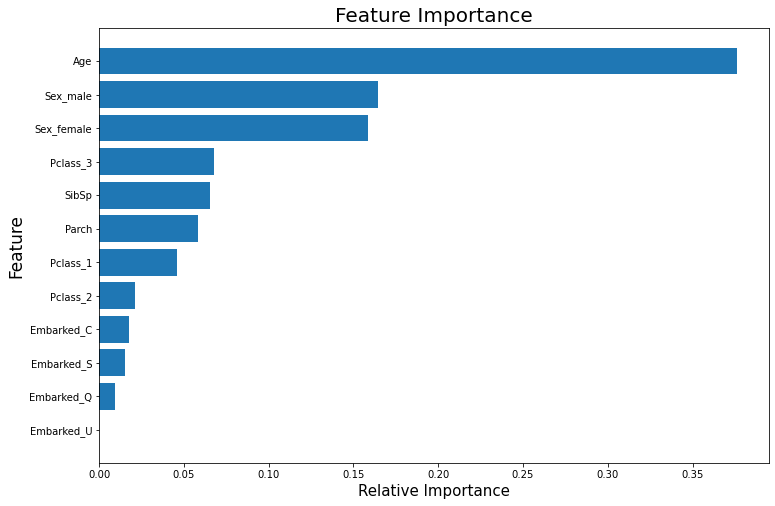

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Show the variable importance
titanic_cln_var_names = titanic_test_X.columns
importances = titanic_rf_clf.feature_importances_
# Return the indices of the sorted array
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.title('Feature Importance', fontsize = 20)
plt.xlabel('Relative Importance', fontsize=15)
plt.ylabel('Feature', fontsize=17)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [titanic_cln_var_names[i] for i in indices])
plt.xlabel('Relative Importance')

**Build Boosted Decision Tree Model**

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
titanic_gbt_clf = GradientBoostingClassifier(loss='exponential', learning_rate=0.1,
                                             n_estimators=100, subsample=1.0, min_samples_split=2,
                                             min_samples_leaf=1, max_depth=3)
titanic_gbt_clf = titanic_gbt_clf.fit(titanic_train_X, titanic_train_survived_Y)

**Model Evaluation**

In [15]:
# Predict survival as the class outcome
titanic_gbt_pred = titanic_gbt_clf.predict(titanic_test_X)
# Build the confusion matrix
titanic_gbt_cm = metrics.confusion_matrix(titanic_test_survived_Y, titanic_gbt_pred, labels=[0,1])
print(titanic_gbt_cm)

[[58 18]
 [18 49]]


In [16]:
# Accuracy
titanic_gbt_acc = metrics.accuracy_score(titanic_test_survived_Y, titanic_gbt_pred)
print('Accuracy', titanic_gbt_acc)
# Precision
titanic_gbt_prec = metrics.precision_score(titanic_test_survived_Y, titanic_gbt_pred)
print('Precision', titanic_gbt_prec)
# Recall
titanic_gbt_rec = metrics.recall_score(titanic_test_survived_Y, titanic_gbt_pred)
print('Recall', titanic_gbt_rec)
# F1 score
titanic_gbt_f1 = metrics.f1_score(titanic_test_survived_Y, titanic_gbt_pred)
print('F1 Score', titanic_gbt_f1)

Accuracy 0.7482517482517482
Precision 0.7313432835820896
Recall 0.7313432835820896
F1 Score 0.7313432835820896
